# Python 实现逻辑回归
# 预测一个年龄30，烟龄12，的人患癌症概率

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:

#-*- coding : utf-8 -*-
# coding: utf-8

import os
data = pd.read_csv('./data/csv/risk.csv')
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [42]:
data.shape

(859, 36)

In [44]:
# 如果数据第一行不是列名的话，可以自己通过pandas 进行指定列名
#data = pd.read_csv('./data/csv/risk.csv',header = None,names = ['','',''])

In [45]:
data.rename(columns={'Smokes (years)':'Smokeyear','Hormonal Contraceptives (years)':'HC',
                            'Dx:Cancer':'DC','Dx:HPV':'DHPV'}, inplace = True) 

In [46]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokeyear,Smokes (packs/year),Hormonal Contraceptives,HC,IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,DC,Dx:CIN,DHPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Smokeyear')

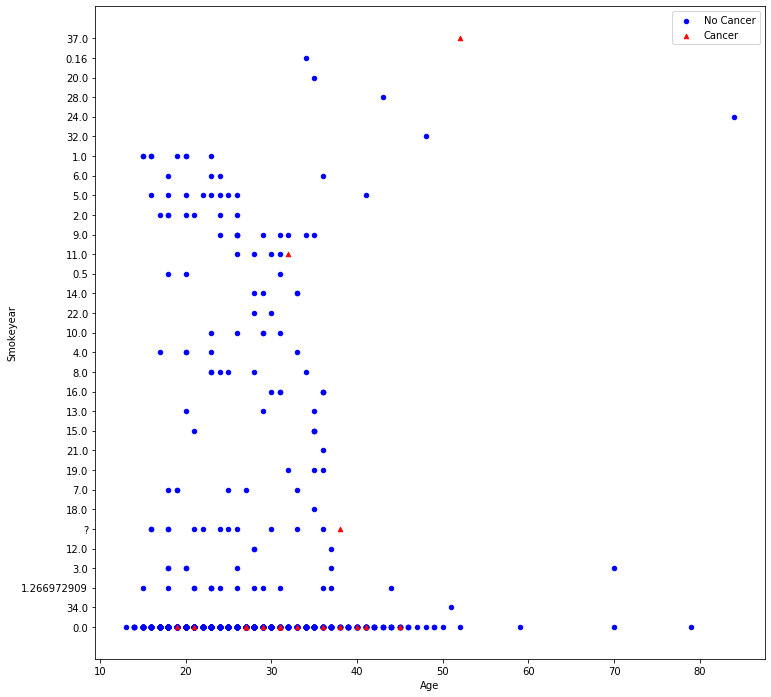

In [54]:
# 对于是否患癌症：Dx:Cancer：列，进行统计1和0两种情况，
# 分别指定正例和负例
positive = data[data['DC'] == 0]
negative = data[data['DC'] == 1]
                
fig,ax = plt.subplots(figsize = (12,12))
ax.scatter(positive['Age'],positive['Smokeyear'],s = 20,c = 'b',marker = 'o',label = 'No Cancer')
ax.scatter(negative['Age'],negative['Smokeyear'],s = 20,c = 'r',marker = '^',label = 'Cancer')

ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Smokeyear")

# 完成梯度下降模块
- 第一点：sigmoid 函数：映射到概率的函数
- 第二点：model: 返回预测结果值
- 第三点：cost: 根据参数计算损失
- 第四点：gradient: 计算每个参数的梯度方向
- 第五点：decent: 进行参数更新
- 第六点：accurancy: 计算精度

In [55]:
# 定义函数
def sigmoid(z):
    return 1/(1 + np.exp(-z))

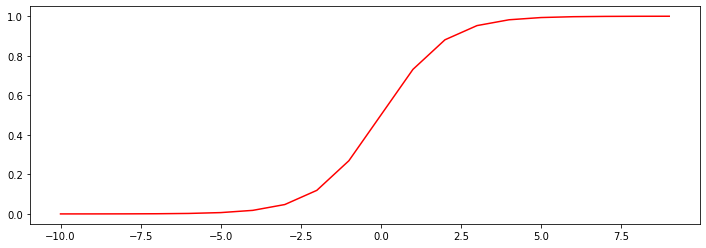

In [81]:
# 
nums = np.arange(-10,10,step = 1)
fig,ax = plt.subplots(figsize = (12,4))
ax.plot(nums,sigmoid(nums),'r')

In [82]:
data.head()

,One,Ones,Age,Smokeyear,DC
0,1,1,18,0.0,0
1,1,1,15,0.0,0
2,1,1,34,0.0,0
3,1,1,52,37.0,1
4,1,1,46,0.0,0


In [83]:
features = ['Ones','Age','Smokeyear','DC']
data = data[features]
print(data.shape)
data.head()

(858, 4)


,Ones,Age,Smokeyear,DC
0,1,18,0.0,0
1,1,15,0.0,0
2,1,34,0.0,0
3,1,52,37.0,1
4,1,46,0.0,0


In [84]:
# 构造回归模型，向原始数据插入一列。model() 预测函数，np.dot() 函数进行矩阵的乘法
def model(x,theta):
    return sigmoid(np.dot(x,theta.T))

In [85]:
data.insert(0,'One',1)


# 设置训练数据x和目标值y
orig_data = data.as_matrix()
cols = orig_data.shape[1]
x = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]

# 
theta = np.zeros([1,3])

d:\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [86]:
x[:5]

array([[1, 1, 18, '0.0'],
       [1, 1, 15, '0.0'],
       [1, 1, 34, '0.0'],
       [1, 1, 52, '37.0'],
       [1, 1, 46, '0.0']], dtype=object)

In [87]:
features = ['Ones','Age','Smokeyear','DC']
data = data[features]
print(data.shape)
data.head()

(858, 4)


,Ones,Age,Smokeyear,DC
0,1,18,0.0,0
1,1,15,0.0,0
2,1,34,0.0,0
3,1,52,37.0,1
4,1,46,0.0,0


In [109]:
# 设置训练数据x和目标值y
orig_data = data.as_matrix()
cols = orig_data.shape[1]
x = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]

# 
theta = np.zeros([1,3])

d:\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [110]:
x[:5]

array([[ 1, 18,  0],
       [ 1, 15,  0],
       [ 1, 34,  0],
       [ 1, 52, 37],
       [ 1, 46,  0]])

In [111]:
y[:5]

array([[0],
       [0],
       [0],
       [1],
       [0]])

In [112]:
theta

array([[0., 0., 0.]])

In [113]:
x.shape , y.shape , theta.shape

((858, 3), (858, 1), (1, 3))

# 损失函数
- 将对数似然函数去负号，求平均损失

In [114]:
def cost(x,y,theta):
    left = np.multiply(-y,np.log(model(x,theta)))
    right = np.multiply(1 - y,np.log(1 - model(x,theta)))
    return np.sum(left - right) / (len(x))

In [115]:
col = list(data.columns)
data[col] = data[col].apply(pd.to_numeric,errors='coerce').fillna(0.0)
data = pd.DataFrame(data,dtype='int')
data.dtypes

# 相乘的时候数据要是整型的，不能死float型的

Ones         int32
Age          int32
Smokeyear    int32
DC           int32
dtype: object

In [116]:
cost(x,y,theta)

0.6931471805599453

# 计算梯度

In [118]:
def gradient(x,y,theta):
    grad = np.zeros(theta.shape)
    error = (model(x,theta) - y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error,x[:,j])
        grad[0,j] = np.sum(term) / len(x)
        
    return grad

In [119]:
#比较三种不同梯度下降方法：批量，随机，小批量


# 指定三种停止策略
STOP_ITER = 0  #根据迭代次数
STOP_COST = 1  #根据损失值，根据目标函数的损失值的变化
STOP_GRAD = 2  #根据梯度，根据梯度下降的大小

def stopCriterion(type, value, threshold):
    #设定三种不同的停止策略
    if type == STOP_ITER:        return value > threshold
           # 指定阈值
    elif type == STOP_COST:      return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:      return np.linalg.norm(value) < threshold


In [120]:
import numpy.random

#洗牌操作shuffle()函数,使得到的数据泛化，进而训练出来的模型泛化能力更强
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    
    # 重新指定数据，x,y
    x = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return x, y


In [121]:
import time


# batchSize:= 1: 随机梯度下降；= 总的样本数：梯度下降；= 1->总的样本数之间：minbatch下降

def descent(data, theta, batchSize, stopType, thresh, alpha):  
    #数据，参数，梯度下降，停止策略，策略对应域值，学习率
    #梯度下降求解
    
    # 初始化
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch
    x, y = shuffleData(data)
    grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(x, y, theta)] # 损失值

    
    while True:
        # 算梯度
        grad = gradient(x[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize #取batch数量个数据
        if k >= n: 
            k = 0 
            x, y = shuffleData(data) #重新洗牌
        theta = theta - alpha*grad # 参数更新
        costs.append(cost(x, y, theta)) # 计算新的损失
        i += 1 

        if stopType == STOP_ITER:       value = i
        elif stopType == STOP_COST:     value = costs
        elif stopType == STOP_GRAD:     value = grad
        if stopCriterion(stopType, value, thresh): break
    
    return theta, i-1, costs, grad, time.time() - init_time

In [122]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    
    #import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    
    
    # 选择梯度下降的方式
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    
    
    # 画图操作
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta


In [124]:
data.shape

(858, 4)

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 50000 iterations
Theta: [[-0.00527227 -0.11539965 -0.00279175]] - Iter: 50000 - Last cost: 0.14 - Duration: 50.30s


array([[-0.00527227, -0.11539965, -0.00279175]])

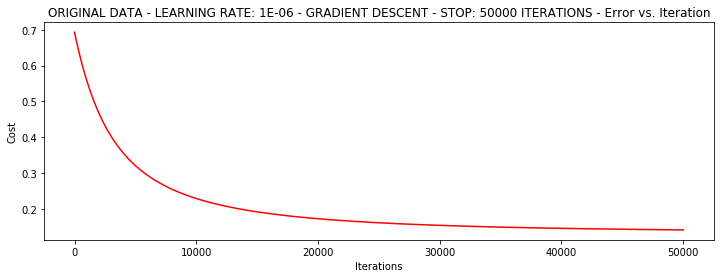

In [125]:
# 选择的梯度下降方法基于所有的样本数据； 基于次数的停止策略：STOP_ITER，迭代次数50000
n = 858
runExpe(orig_data,theta,n,STOP_ITER,thresh = 50000,alpha = 0.000001)

# 设置不同的其他策略
- 根据损失值停止设定阈值1e-6，差不多需要110000次迭代

***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-0.01862485 -0.14381021  0.02790054]] - Iter: 1028 - Last cost: 0.13 - Duration: 1.06s


array([[-0.01862485, -0.14381021,  0.02790054]])

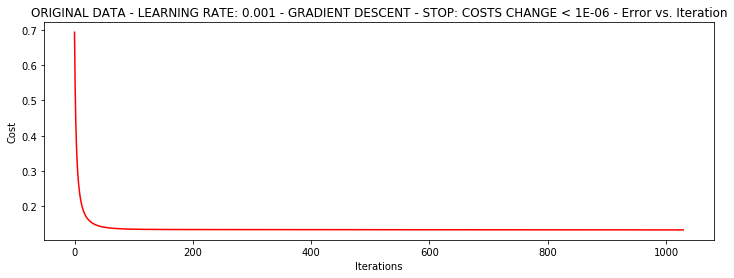

In [126]:
runExpe(orig_data,theta,n,STOP_COST,thresh = 0.000001,alpha = 0.001)

# 根据梯度变化停止 :STOP_GRAD
- 第一点：设定阈值0.05，差不多要40000次数迭代

***Original data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.05
Theta: [[-0.00826678 -0.14107008  0.00158244]] - Iter: 200 - Last cost: 0.13 - Duration: 0.22s


array([[-0.00826678, -0.14107008,  0.00158244]])

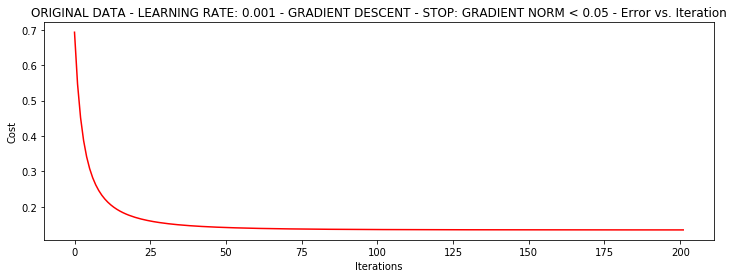

In [127]:
runExpe(orig_data,theta,n,STOP_GRAD,thresh = 0.05,alpha = 0.001)

# 对比不同的梯度下降方法

***Original data - learning rate: 0.001 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.06459228 -0.14323984  0.10494891]] - Iter: 5000 - Last cost: 0.13 - Duration: 0.44s


array([[-0.06459228, -0.14323984,  0.10494891]])

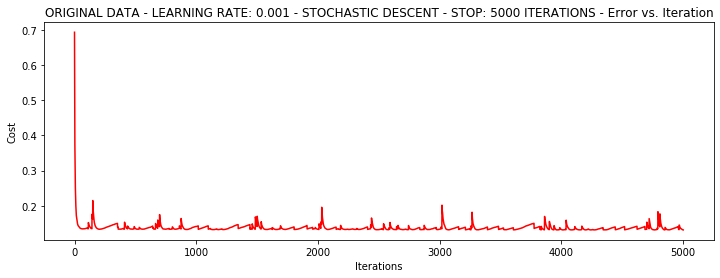

In [128]:
# 每次迭代一个样本，不稳定
runExpe(orig_data,theta,1,STOP_ITER,thresh = 5000,alpha = 0.001)
# 可见模型结果收敛的不是太好

***Original data - learning rate: 2e-05 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.00662158 -0.13215825 -0.00147355]] - Iter: 5000 - Last cost: 0.14 - Duration: 0.42s


array([[-0.00662158, -0.13215825, -0.00147355]])

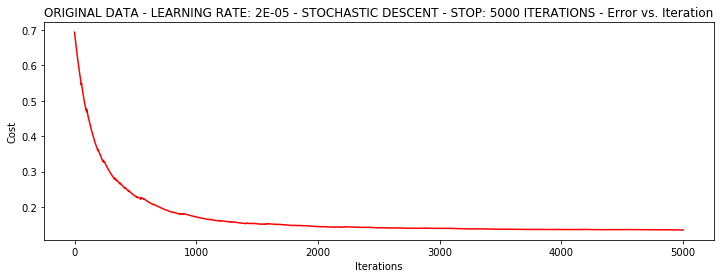

In [129]:
# 调小学习率
runExpe(orig_data,theta,1,STOP_ITER,thresh = 5000,alpha = 0.00002)

# 以上速度快，稳定性差，需要更小的学习率，即步长

***Original data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 5000 iterations
Theta: [[-0.06640634 -0.14562928  0.09348896]] - Iter: 5000 - Last cost: 0.13 - Duration: 0.51s


array([[-0.06640634, -0.14562928,  0.09348896]])

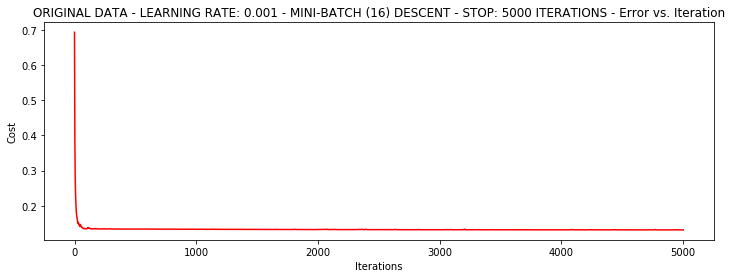

In [135]:
# 每次迭代16个数据，停止策略minbatch类型
runExpe(orig_data,theta,16,STOP_ITER,thresh = 5000,alpha = 0.001)

***Original data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.06657608 -0.14573284  0.09234414]] - Iter: 5000 - Last cost: 0.13 - Duration: 4.96s


array([[-0.06657608, -0.14573284,  0.09234414]])

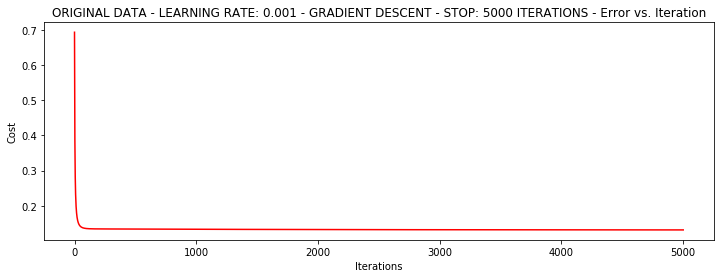

In [134]:
# 每次迭代16个数据，停止策略梯度下降类型
runExpe(orig_data,theta,n,STOP_ITER,thresh = 5000,alpha = 0.001)

浮动仍然比较大，对数据进行标准化处理，将数据按属性（按列进行）减去其平均值，然后除以其方差，最后得到的结果是对每一个属性所有数据都聚集在0附近，方差为1

***Original data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[-1.42129077  0.00512846 -0.17555739]] - Iter: 5000 - Last cost: 0.24 - Duration: 4.76s


array([[-1.42129077,  0.00512846, -0.17555739]])

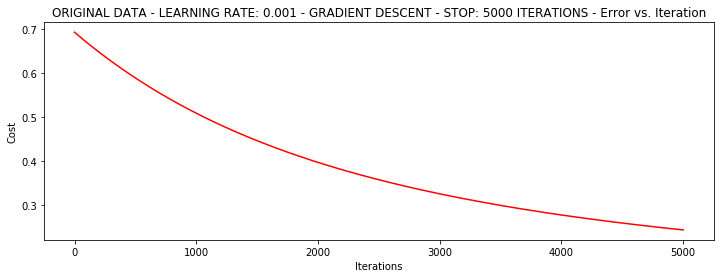

In [133]:
from sklearn import preprocessing as pp

scaled_data = orig_data.copy()
scaled_data[:,1:3] = pp.scale(orig_data[:,1:3])

runExpe(scaled_data,theta,n,STOP_ITER,thresh = 5000,alpha = 0.001)

***Original data - learning rate: 0.001 - Gradient descent - Stop: 15000 iterations
Theta: [[-2.40628376  0.06259491 -0.19529761]] - Iter: 15000 - Last cost: 0.14 - Duration: 14.42s


array([[-2.40628376,  0.06259491, -0.19529761]])

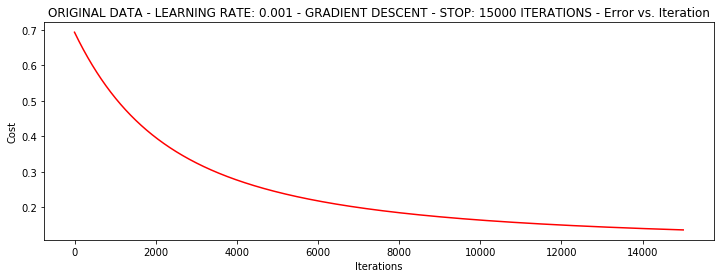

In [136]:
# 迭代次数更多，得到的更好
runExpe(scaled_data,theta,n,STOP_ITER,thresh = 15000,alpha = 0.001)

***Original data - learning rate: 0.001 - Mini-batch (16) descent - Stop: gradient norm < 0.004
Theta: [[-1.912732    0.02532537 -0.19785362]] - Iter: 8716 - Last cost: 0.18 - Duration: 0.95s


array([[-1.912732  ,  0.02532537, -0.19785362]])

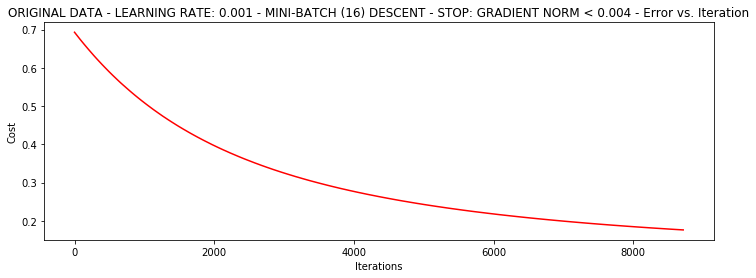

In [137]:
# minbatch= 16,指定迭代次数较少的情况下，要先对数据进行处理，再修该模型
runExpe(scaled_data,theta,16,STOP_GRAD,thresh = 0.002*2,alpha = 0.001)

# 把概率值转化为类别值
# 大于0.5,代表患癌症，小于0.5，代表不患癌症

# 精度

In [145]:
def predict(x,theta):
    return [1 if x >=0.5 else 0 for x in model(x,theta)]

In [146]:
scaled_x = scaled_data[:,:3]
y = scaled_data[:,3]
predictions = predict(scaled_x,theta)
correct = [1 if ((a == 0 and b == 0) or (a == 1 and b == 1)) else 0 for (a,b) in zip(predictions,y)]
accuracy = (sum(map(int,correct)) % len(correct))
print("accuracy = {0}%".format(accuracy))

accuracy = 18%
